# Imports & Dependencies

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')

import datetime

import numpy as np

import matplotlib.pyplot as plt

# Read in Data

##### Real-Time Market Prices

In [2]:
sheets_dict = pd.read_excel('data/RTM_prices.xlsx', sheet_name=None)

prices_df = pd.DataFrame()
for name, sheet in sheets_dict.items():
    sheet['Month'] = name
    month = sheet.rename(columns=lambda x: x.split('\n')[-1])
    prices_df = prices_df.append(month)

prices_df.reset_index(inplace=True, drop=True)

##### SCED Price Adders

In [3]:
priceAdder_dict = pd.read_excel('data/RT_PriceAdders.xlsx', sheet_name=None)

price_adder_df = pd.DataFrame()
for name, sheet in priceAdder_dict.items():
    sheet['Month'] = name
    month = sheet.rename(columns=lambda x: x.split('\n')[-1])
    price_adder_df = price_adder_df.append(month)

price_adder_df.reset_index(inplace=True, drop=True)

##### Hourly Generation Load - ERCOT

In [4]:
hourly_load_df = pd.read_excel('data/hourly_load.xlsx')

print(hourly_load_df.shape)
hourly_load_df.head()

(2159, 12)


,Date,Hour Ending,Hour Interval,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,2021-01-01,01:00:00,1,11047.018793,1517.435253,3978.220628,838.352810,13575.277728,3545.093310,7778.262533,1440.188560,43719.849616
1,2021-01-01,02:00:00,2,10954.470339,1523.683893,3975.757045,825.123437,13340.337915,3586.547882,7693.744119,1421.385715,43321.050347
2,2021-01-01,03:00:00,3,10883.657240,1519.800916,3969.812081,819.551228,13311.625189,3586.124059,7566.951524,1405.544826,43063.067063
3,2021-01-01,04:00:00,4,10926.482445,1523.472963,3983.487761,820.612439,13356.442066,3570.592369,7506.685527,1402.283632,43090.059203
4,2021-01-01,05:00:00,5,11019.796399,1565.625573,3980.940744,831.607158,13528.651487,3590.902242,7563.971854,1405.094618,43486.590073


##### Generation by Fuel Source - Interval Data

In [5]:
generation_df = pd.read_excel('data/RT_Generation.xlsx')

print(generation_df.shape)
generation_df.head()

(810, 100)


,Date,Fuel,Settlement Type,Total,0:15,0:30,0:45,1:00,1:15,1:30,1:45,2:00,2:15,2:30,2:45,3:00,3:15,3:30,3:45,4:00,4:15,4:30,4:45,5:00,5:15,5:30,5:45,6:00,6:15,6:30,6:45,7:00,7:15,7:30,7:45,8:00,8:15,8:30,8:45,9:00,9:15,9:30,9:45,10:00,10:15,10:30,10:45,11:00,11:15,11:30,11:45,12:00,12:15,12:30,12:45,13:00,13:15,13:30,13:45,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45,0:00
0,2021-01-01,Biomass,FINAL,704.718604,7.411995,7.406062,7.412330,7.411520,7.412624,7.413291,7.414797,7.412481,7.413242,7.423830,7.407722,7.421340,7.419004,7.413664,7.416558,7.421234,7.414332,7.419658,7.415603,7.413975,7.164380,7.029791,7.039068,7.296376,7.412736,7.421351,7.410899,7.415952,7.415174,7.415856,7.417565,7.415540,7.414238,7.417123,7.418592,7.417860,7.403535,7.410477,7.411185,7.402382,7.405985,7.401941,7.403941,7.409941,7.409336,7.416701,7.408491,7.409546,7.410379,7.409837,7.415569,7.406700,7.311304,7.031186,7.026665,7.033915,7.069447,7.384680,7.415271,7.403396,7.411466,7.400837,7.412809,7.402765,7.410712,7.413594,7.403644,7.402985,7.404345,7.399120,7.401736,7.394268,7.397906,7.396439,7.031423,7.010770,7.022318,7.014497,6.782650,6.869875,7.393912,7.394420,7.352730,7.349335,7.366632,7.345729,7.345063,7.352867,7.346401,7.204626,6.994781,7.274248,7.397511,7.392862,7.395558,7.398197
1,2021-01-01,Coal,FINAL,209114.074688,1562.671544,1569.063113,1550.287075,1544.381811,1550.812567,1552.157660,1536.286019,1526.983478,1529.342569,1528.708089,1524.636562,1520.757113,1531.013304,1552.654808,1567.421593,1585.132031,1667.372186,1687.665979,1706.533346,1758.003328,1833.375116,1938.799453,1959.127891,1972.186451,2033.223878,2095.779426,2133.847502,2141.191365,2179.417187,2194.383047,2220.258751,2270.037278,2287.503246,2274.646821,2219.195866,2165.187230,2127.813362,2032.708969,1947.034206,1868.907211,1808.301841,1753.416727,1715.118542,1666.916611,1659.310452,1658.110210,1668.825357,1692.448650,1689.393712,1746.902075,1780.190560,1795.486127,1807.748545,1814.789482,1815.664080,1833.838217,1874.872661,1901.085455,1938.953307,1999.357005,2012.695618,2033.781880,2067.216888,2162.891398,2271.288778,2376.067529,2540.738585,2673.104400,2736.212861,2862.165316,2950.836168,2996.738172,3017.034016,3037.277687,3039.100977,3035.595983,3027.456023,2999.553948,2993.704191,2995.371674,3004.193094,3010.181083,3001.394008,2999.700858,3006.981046,3003.230119,2985.433370,2975.523727,2981.958624,2929.756226,2828.359991,2752.276793,2706.544582,2690.365878,2683.707675,2658.397475
2,2021-01-01,Gas,FINAL,36927.542196,322.166053,311.591247,314.881020,315.973877,327.020826,335.706445,337.172262,337.068045,340.157651,348.661088,338.923212,341.566785,345.998118,345.251989,340.803526,338.462896,339.795296,339.302475,334.411644,329.953978,353.931410,369.726057,377.223749,398.826230,412.666809,414.200937,416.287573,418.592462,419.030326,419.590717,419.862084,415.476330,414.098462,416.627209,422.536406,422.191154,413.914912,412.008177,407.574867,417.381576,401.765545,399.533289,394.544249,391.240752,378.134048,373.352069,371.975077,369.245292,363.608034,354.807870,350.759315,347.188058,346.248068,344.517269,344.124116,347.270993,344.417189,342.739884,345.337395,342.127422,343.466904,340.549293,340.876136,339.343615,347.597341,352.022472,350.366436,380.383346,427.283136,432.578603,441.731006,465.654719,470.234237,488.799038,462.964426,450.293389,490.066321,516.671788,517.339348,515.065990,503.840591,497.346772,482.518748,481.409451,459.941061,459.793689,445.510766,397.195366,366.944189,355.220027,355.129441,355.569998,354.866419,314.389883,267.579114,257.447323
3,2021-01-01,Gas-CC,FINAL,464762.485813,4320.059659,4234.444620,4205.231653,4187.540619,4162.543282,4094.140815,4039.391556,4038.805135,4022.934880,4031.249891,4028.382225,4023.409976,4096.554515,4203.679716,4290.697513,4326.695469,4402.143300,441

##### ORDC Reserve Pricing

In [6]:
ORDC_df = pd.read_excel('data/RT_ORDC_prices.xlsx')

print(ORDC_df.shape)
ORDC_df

(11612, 7)


,DeliveryDate,DeliveryHour,DeliveryInterval,RepeatedHourFlag,RTRSVPOR,RTRSVPOFF,RTRDP
0,2021-01-01,1,1,N,0.0,0.0,0.0
1,2021-01-01,1,2,N,0.0,0.0,0.0
2,2021-01-01,1,3,N,0.0,0.0,0.0
3,2021-01-01,1,4,N,0.0,0.0,0.0
4,2021-01-01,2,1,N,0.0,0.0,0.0
...,...,...,...,...,...,...,...
11607,2021-05-01,23,4,N,0.0,0.0,0.0
11608,2021-05-01,24,1,N,0.0,0.0,0.0
11609,2021-05-01,24,2,N,0.0,0.0,0.0
11610,2021-05-01,24,3,N,0.0,0.0,0.0


# Inspect Data

In [7]:
df_list = [prices_df, price_adder_df, hourly_load_df, generation_df, ORDC_df]

for df in df_list:
    print(df.shape)
    print(df.info())

(267077, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267077 entries, 0 to 267076
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Delivery Date           267077 non-null  object 
 1   Delivery Hour           267076 non-null  object 
 2   Delivery Interval       267076 non-null  object 
 3   Repeated Hour Flag      267077 non-null  object 
 4   Settlement Point Name   267076 non-null  object 
 5   Settlement Point Type   267077 non-null  object 
 6   Settlement Point Price  267076 non-null  float64
 7   Month                   267077 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.3+ MB
None
(35694, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35694 entries, 0 to 35693
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Batch ID                  

# Clean Data

##### Fix Null Values - RT Pricing

In [8]:
prices_df = prices_df.dropna(how='any', axis=0)
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267076 entries, 0 to 267075
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Delivery Date           267076 non-null  object 
 1   Delivery Hour           267076 non-null  object 
 2   Delivery Interval       267076 non-null  object 
 3   Repeated Hour Flag      267076 non-null  object 
 4   Settlement Point Name   267076 non-null  object 
 5   Settlement Point Type   267076 non-null  object 
 6   Settlement Point Price  267076 non-null  float64
 7   Month                   267076 non-null  object 
dtypes: float64(1), object(7)
memory usage: 18.3+ MB


##### Fix Column Name in Price Adders

In [9]:
price_adder_df.rename(columns = {'      SCED Timestamp      ': 'SCED Timestamp'}, inplace=True)

price_adder_df.columns

Index(['Batch ID', 'SCED Timestamp', 'Repeated Hour Flag', 'System Lamda',
       'PRC', 'RTOLCAP', 'RTOFFCAP', 'RTORPA', 'RTOFFPA', 'RTOLHSL', 'RTBP',
       'RTOLNSRS', 'RTCLRCAP', 'RTCLRBP', 'RTCLRLSL', 'RTCLRNS', 'RTCLRREG',
       'RTNCLRRRS', 'RTCST30HSL', 'RTOFFNSHSL', 'RTRUCCST30HSL', 'RTORDPA',
       'RTRRUC', 'RTRRMR', 'RTDNCLR', 'RTDERS', 'RTDCTIEIMPORT',
       'RTDCTIEEXPORT', 'RTBLTIMPORT', 'RTBLTEXPORT', 'RTOLLASL', 'RTOLHASL',
       'Month'],
      dtype='object')

##### Fix Null Values - Generation by Fuel Source

In [10]:
genBackup_df = generation_df

null_cols=generation_df.columns[generation_df.isna().any()]
mask = generation_df.loc[generation_df[null_cols[0]].isna()]

print(generation_df[generation_df.isnull().any(axis=1)][null_cols])
print('----------------------------------------')
print(null_cols)

     2:15  2:30  2:45  3:00
648   NaN   NaN   NaN   NaN
649   NaN   NaN   NaN   NaN
650   NaN   NaN   NaN   NaN
651   NaN   NaN   NaN   NaN
652   NaN   NaN   NaN   NaN
653   NaN   NaN   NaN   NaN
654   NaN   NaN   NaN   NaN
655   NaN   NaN   NaN   NaN
656   NaN   NaN   NaN   NaN
----------------------------------------
Index(['2:15', '2:30', '2:45', '3:00'], dtype='object')


In [11]:
# Get averages per fuel source per interval to fill null values
genAvg_df = generation_df.groupby(['Fuel']).mean().reset_index()
avgs_array = np.array(genAvg_df[null_cols])

print(avgs_array)
genAvg_df

[[ 5.61001280e+00  5.60602583e+00  5.61374375e+00  5.61035665e+00]
 [ 1.66049107e+03  1.65449329e+03  1.65330342e+03  1.65312508e+03]
 [ 4.42468658e+02  4.40799811e+02  4.38020286e+02  4.37382394e+02]
 [ 2.65401505e+03  2.65198218e+03  2.65475465e+03  2.66228879e+03]
 [ 1.06536868e+01  1.03048053e+01  1.03030592e+01  1.01489998e+01]
 [ 1.21730630e+03  1.21737269e+03  1.21737370e+03  1.21742260e+03]
 [-3.44401876e-01 -3.20000685e-01 -3.47946371e-01  2.10908494e-01]
 [ 5.55046067e-03  5.55492135e-03  5.52514607e-03  1.74044045e-02]
 [ 3.04038158e+03  3.03218975e+03  3.02440521e+03  3.01768654e+03]]


,Fuel,Total,0:15,0:30,0:45,1:00,1:15,1:30,1:45,2:00,2:15,2:30,2:45,3:00,3:15,3:30,3:45,4:00,4:15,4:30,4:45,5:00,5:15,5:30,5:45,6:00,6:15,6:30,6:45,7:00,7:15,7:30,7:45,8:00,8:15,8:30,8:45,9:00,9:15,9:30,9:45,10:00,10:15,10:30,10:45,11:00,11:15,11:30,11:45,12:00,12:15,12:30,12:45,13:00,13:15,13:30,13:45,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45,0:00
0,Biomass,536.054136,5.724082,5.708308,5.703138,5.688084,5.679452,5.661772,5.648998,5.629821,5.610013,5.606026,5.613744,5.610357,5.615007,5.608125,5.608700,5.597200,5.597414,5.606067,5.599700,5.586922,5.585604,5.586138,5.584551,5.571963,5.547313,5.531190,5.527135,5.518702,5.510417,5.476226,5.479920,5.471708,5.439906,5.407088,5.379429,5.342208,5.286279,5.274688,5.277155,5.282206,5.274959,5.267370,5.266018,5.305525,5.351178,5.406842,5.424433,5.435737,5.404802,5.389412,5.393929,5.416765,5.420054,5.432631,5.460707,5.476897,5.460840,5.465282,5.469965,5.478017,5.499988,5.534021,5.564518,5.577170,5.599729,5.614137,5.625901,5.637956,5.649417,5.680317,5.699319,5.733736,5.754294,5.775946,5.796889,5.826107,5.849728,5.856552,5.853063,5.845676,5.830206,5.820721,5.816725,5.825319,5.809514,5.804064,5.807891,5.799898,5.792645,5.784533,5.759919,5.753324,5.738140,5.736333,5.735670,5.729990
1,Coal,181999.791862,1749.266976,1737.232698,1720.138816,1701.464518,1687.933358,1677.136538,1667.953962,1659.446690,1660.491069,1654.493289,1653.303425,1653.125083,1650.528072,1662.079736,1670.504860,1676.501924,1698.247997,1724.330967,1737.150128,1746.152794,1765.341498,1798.541088,1833.190360,1852.127502,1873.659276,1921.611609,1975.955879,2019.463942,2062.827780,2092.059225,2099.365467,2099.973571,2105.249961,2092.762995,2069.142786,2043.207286,2032.770076,2023.289331,2007.445968,1991.502185,1976.328757,1961.128423,1940.978249,1913.665892,1905.323404,1897.057678,1892.642453,1884.334379,1876.330935,1876.092137,1866.952757,1853.921834,1849.826394,1850.753226,1845.746631,1839.660540,1831.371775,1825.283074,1818.148697,1807.306722,1798.052605,1796.537631,1796.817971,1798.228693,1798.789365,1813.046839,1837.258539,1872.490425,1895.372510,1940.761425,1990.907732,2033.059182,2066.427411,2096.566272,2114.606766,2125.208502,2131.015078,2136.126654,2136.701200,2133.658027,2126.419962,2119.965346,2103.357753,2086.685338,2074.002689,2060.919785,2036.098428,1999.514403,1974.652562,1965.841673,1936.584523,1896.703512,1865.736091,1850.921489,1820.431257,1784.070836
2,Gas,55648.061172,464.831607,462.471686,457.091505,452.567257,449.201829,445.576633,443.227987,443.265386,442.468658,440.799811,438.020286,437.382394,437.294305,438.413336,440.786749,446.074214,453.593021,457.116121,463.265665,473.447107,493.839036,513.321572,534.915768,560.635757,594.811421,618.783457,638.612482,659.340426,672.855108,680.393482,681.736087,681.395447,683.260750,677.647023,668.230686,663.479684,662.428255,661.821026,658.748021,653.276139,645.538525,641.786889,636.932861,629.661399,624.196100,618.579224,612.858750,607.877664,606.895437,601.765017,596.296018,589.877047,585.330125,583.355795,583.253307,582.512210,579.672174,580.353493,578.768020,578.915691,579.775423,583.728064,586.594217,590.691333,595.805565,600.329199,607.373109,619.985756,631.039918,646.012279,659.600295,684.070020,700.754854,716.587128,723.811756,723.021633,707.340372,697.401515,691.778027,690.132520,681.701629,664.310469,647.486059,631.069427,611.398335,590.615126,572.859559,561.073604,539.799656,520.318864,506.232855,497.745865,486.959981,475.324451,468.184419,465.835752
3,Gas-CC,313580.289992,2772.805676,2723.487142,2697.045576,2683.023159,2669.420929,2655.633163,2647.285372,2639.672760,2654.015053,2651.982177,2654.754651,2662.288788,2666.571754,2679.704391,2700.378377,2728.150700,2769.286925,2794.983015,2832.014316,2895.099331,2995.348156,3048.340599,3118.085801,3213.524136,3366.757

In [12]:
# null_cols = gen2_df.columns[gen2_df.isnull().any()]
# mask = gen2_df.loc[gen2_df[null_cols[0]].isna()]

counter = 0

for fuel in mask.Fuel:
    mask.fillna(value = {null_cols[0]: avgs_array[counter][0], null_cols[1]: avgs_array[counter][1],
                        null_cols[2]: avgs_array[counter][2], null_cols[3]: avgs_array[counter][3]}, 
                limit=1, inplace=True, axis=0)
    
    counter = (counter + 1)
    
mask


,Date,Fuel,Settlement Type,Total,0:15,0:30,0:45,1:00,1:15,1:30,1:45,2:00,2:15,2:30,2:45,3:00,3:15,3:30,3:45,4:00,4:15,4:30,4:45,5:00,5:15,5:30,5:45,6:00,6:15,6:30,6:45,7:00,7:15,7:30,7:45,8:00,8:15,8:30,8:45,9:00,9:15,9:30,9:45,10:00,10:15,10:30,10:45,11:00,11:15,11:30,11:45,12:00,12:15,12:30,12:45,13:00,13:15,13:30,13:45,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45,0:00
648,2021-03-14,Biomass,INITIAL,537.648437,5.974033,5.813899,5.755459,5.824362,6.059325,6.019496,6.158080,6.155525,5.610013,5.606026,5.613744,5.610357,6.164631,6.138281,6.149793,6.150539,6.152229,6.161934,6.152196,6.153774,6.158473,6.038931,5.851774,5.863244,5.867352,5.871172,5.866272,5.860834,5.600857,5.380004,5.376438,5.380162,5.376877,5.343638,5.371428,5.353329,5.369500,5.375916,5.476460,6.013931,6.170760,6.195017,6.197670,6.200034,6.182285,6.205258,6.193504,6.181436,6.177743,6.166222,6.159173,6.160065,5.826960,5.640611,5.635391,5.640774,5.625992,5.627567,5.632265,5.621504,5.772586,6.116404,5.922951,5.455524,5.494821,5.608698,5.625524,5.608897,5.619069,5.614414,5.613243,5.614951,5.624229,5.624149,5.900685,6.159094,6.179065,6.164873,5.890938,5.877963,5.891523,5.878258,5.879239,5.877460,5.825991,5.811997,5.591942,5.527872,5.564346,5.844404,5.870379,5.879652,5.861747,5.863919,5.883560,5.887691
649,2021-03-14,Coal,INITIAL,117373.721575,1061.912071,1090.689239,1046.041726,1019.859176,998.465719,982.864050,957.168402,961.635590,1660.491069,1654.493289,1653.303425,1653.125083,957.999204,959.980223,986.829813,994.762715,1019.060437,1010.817084,993.755182,999.266572,1008.999367,1006.417010,1019.212888,1038.880227,1094.827391,1134.154130,1208.187876,1292.691699,1330.256975,1413.088344,1457.842991,1382.848730,1370.846264,1377.056419,1290.398182,1241.716811,1261.686814,1231.678388,1242.600117,1199.419783,1203.420470,1184.667581,1204.253073,1212.248184,1203.131704,1151.134842,1131.418247,1113.320130,1095.261376,1101.707740,1091.259582,1075.022663,1070.377078,1071.961856,1055.878526,1022.093754,1013.246250,988.950609,1003.153575,998.004103,993.324194,1000.963120,1009.238500,998.123036,1017.846563,1058.755801,1114.996689,1182.349274,1202.110021,1222.858426,1260.529794,1307.694538,1370.437096,1420.823434,1452.995206,1499.360783,1609.472881,1776.157007,1854.727389,1896.427823,1908.311222,1895.183741,1897.688285,1900.564897,1869.517505,1880.295997,1858.431298,1874.897870,1867.215289,1855.587532,1824.396657,1810.719250,1688.336659,1552.857414,1472.863561,1333.233871
650,2021-03-14,Gas,INITIAL,33991.327092,286.787882,265.837390,251.868635,250.634731,257.808045,257.648133,256.420275,258.782251,442.468658,440.799811,438.020286,437.382394,261.307005,261.998964,260.410675,259.982787,259.604270,262.360166,263.091173,269.446090,275.818555,296.065109,329.323457,352.128389,366.523328,367.203411,374.509716,360.100025,355.493126,352.542018,350.641210,349.282283,351.627068,349.361580,347.994667,346.728783,338.754452,345.289338,340.721783,344.662813,349.083509,350.904515,356.357400,359.597069,346.034091,343.807739,351.366409,343.860882,346.150916,344.991614,337.727790,335.618930,323.523224,307.428906,306.592604,304.905119,307.995796,306.668742,307.238044,301.183403,302.031251,309.105426,304.519551,307.848521,329.000451,330.490223,339.875043,343.523051,341.066435,349.678046,350.316646,346.424762,358.422031,380.054550,394.416645,394.411929,417.159383,502.657460,632.561832,778.468542,857.984610,883.734218,857.021545,793.085806,724.087711,605.871536,528.130713,431.178412,410.162732,377.762709,343.183361,329.127332,323.276078,327.095292,330.843289,346.953685
651,2021-03-14,Gas-CC,INITIAL,117391.608035,1188.022378,1082.369518,1037.602768,1010.746897,1027.877879,1026.965017,1021.289027,1052.150126,2654.015053,2651.982177,2654.754651,2662.288788,1047.634475,1078.189637,1052.789868,1034.111350,1032.449155,1

In [13]:
generation_df.fillna(value=mask, inplace=True)
print(generation_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 100 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             810 non-null    datetime64[ns]
 1   Fuel             810 non-null    object        
 2   Settlement Type  810 non-null    object        
 3   Total            810 non-null    float64       
 4   0:15             810 non-null    float64       
 5   0:30             810 non-null    float64       
 6   0:45             810 non-null    float64       
 7   1:00             810 non-null    float64       
 8   1:15             810 non-null    float64       
 9   1:30             810 non-null    float64       
 10  1:45             810 non-null    float64       
 11  2:00             810 non-null    float64       
 12  2:15             810 non-null    float64       
 13  2:30             810 non-null    float64       
 14  2:45             810 non-null    float64 

# Correct Data Types

##### Prices DF - Change Object Cols to Numeric/Datetime

In [14]:
# df_list = [prices_df, price_adder_df, hourly_load_df, generation_df, ORDC_df]

#prices_df
## Delivery Date - Datetime
## Delivery Hour - Integer
## Delivery Interval - Integer
## Repeated Hour Flag - Str
## Settlement Point Name - Str
## Settlement Point Type - Str
## Settlement Point Price -- Float
## Month - Str

prices_df.info()
prices_df_copy = prices_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267076 entries, 0 to 267075
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Delivery Date           267076 non-null  object 
 1   Delivery Hour           267076 non-null  object 
 2   Delivery Interval       267076 non-null  object 
 3   Repeated Hour Flag      267076 non-null  object 
 4   Settlement Point Name   267076 non-null  object 
 5   Settlement Point Type   267076 non-null  object 
 6   Settlement Point Price  267076 non-null  float64
 7   Month                   267076 non-null  object 
dtypes: float64(1), object(7)
memory usage: 18.3+ MB


In [15]:
prices_df['Delivery Date'] = pd.to_datetime(prices_df['Delivery Date'], errors='raise', format='%m/%d/%Y')
prices_df['Delivery Hour'] = pd.to_numeric(prices_df['Delivery Hour'], errors='raise')
prices_df['Delivery Interval'] = pd.to_numeric(prices_df['Delivery Interval'], errors='raise')
prices_df['Settlement Point Price'] = pd.to_numeric(prices_df['Settlement Point Price'], errors='raise')

prices_df

,Delivery Date,Delivery Hour,Delivery Interval,Repeated Hour Flag,Settlement Point Name,Settlement Point Type,Settlement Point Price,Month
0,2021-01-01,1,1,N,HB_BUSAVG,SH,15.54,Jan
1,2021-01-01,1,2,N,HB_BUSAVG,SH,15.38,Jan
2,2021-01-01,1,3,N,HB_BUSAVG,SH,15.27,Jan
3,2021-01-01,1,4,N,HB_BUSAVG,SH,14.73,Jan
4,2021-01-01,1,1,N,HB_HOUSTON,HU,15.86,Jan
...,...,...,...,...,...,...,...,...
267071,2021-05-01,24,2,N,LZ_WEST,LZ,19.09,May
267072,2021-05-01,24,3,N,LZ_WEST,LZEW,18.78,May
267073,2021-05-01,24,3,N,LZ_WEST,LZ,18.78,May
267074,2021-05-01,24,4,N,LZ_WEST,LZ,18.43,May


##### Hourly Load - Clean up Datetime Cols

In [16]:
print(hourly_load_df['Hour Ending'].value_counts())

#Format cells for Datetime
hourly_load_df.loc[(hourly_load_df['Hour Interval'] == 24),'Hour Ending']='00:00:00'

print('-----------------------------------------------------')
print(hourly_load_df['Hour Ending'].value_counts())

11:00:00               90
15:00:00               90
23:00:00               90
16:00:00               90
14:00:00               90
02:00:00               90
04:00:00               90
05:00:00               90
13:00:00               90
18:00:00               90
09:00:00               90
12:00:00               90
06:00:00               90
19:00:00               90
17:00:00               90
08:00:00               90
21:00:00               90
22:00:00               90
07:00:00               90
10:00:00               90
01:00:00               90
20:00:00               90
1900-01-01 00:00:00    89
03:00:00               89
00:00:00                1
Name: Hour Ending, dtype: int64
-----------------------------------------------------
15:00:00    90
20:00:00    90
23:00:00    90
16:00:00    90
14:00:00    90
02:00:00    90
04:00:00    90
05:00:00    90
13:00:00    90
18:00:00    90
09:00:00    90
12:00:00    90
00:00:00    90
11:00:00    90
19:00:00    90
17:00:00    90
08:00:00    90
21:00:00 

In [17]:
#Remove DST
rng = pd.date_range('1/1/2021 01:00:00', periods=2160, freq='H')
final_rng = rng[rng != '2021-03-14 03:00:00'] 
final_rng

DatetimeIndex(['2021-01-01 01:00:00', '2021-01-01 02:00:00',
               '2021-01-01 03:00:00', '2021-01-01 04:00:00',
               '2021-01-01 05:00:00', '2021-01-01 06:00:00',
               '2021-01-01 07:00:00', '2021-01-01 08:00:00',
               '2021-01-01 09:00:00', '2021-01-01 10:00:00',
               ...
               '2021-03-31 15:00:00', '2021-03-31 16:00:00',
               '2021-03-31 17:00:00', '2021-03-31 18:00:00',
               '2021-03-31 19:00:00', '2021-03-31 20:00:00',
               '2021-03-31 21:00:00', '2021-03-31 22:00:00',
               '2021-03-31 23:00:00', '2021-04-01 00:00:00'],
              dtype='datetime64[ns]', length=2159, freq=None)

In [18]:
cols = ['Datetime', 'Hour Ending', 'Hour Interval', 'COAST', 'EAST', 'FWEST',
       'NORTH', 'NCENT', 'SOUTH', 'SCENT', 'WEST', 'ERCOT']

hourly_load_df['Datetime'] = final_rng
hourly_load_df['Hour Ending'] = final_rng.hour

hourly_load_df = hourly_load_df[cols]
hourly_load_df.head()

,Datetime,Hour Ending,Hour Interval,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,2021-01-01 01:00:00,1,1,11047.018793,1517.435253,3978.220628,838.352810,13575.277728,3545.093310,7778.262533,1440.188560,43719.849616
1,2021-01-01 02:00:00,2,2,10954.470339,1523.683893,3975.757045,825.123437,13340.337915,3586.547882,7693.744119,1421.385715,43321.050347
2,2021-01-01 03:00:00,3,3,10883.657240,1519.800916,3969.812081,819.551228,13311.625189,3586.124059,7566.951524,1405.544826,43063.067063
3,2021-01-01 04:00:00,4,4,10926.482445,1523.472963,3983.487761,820.612439,13356.442066,3570.592369,7506.685527,1402.283632,43090.059203
4,2021-01-01 05:00:00,5,5,11019.796399,1565.625573,3980.940744,831.607158,13528.651487,3590.902242,7563.971854,1405.094618,43486.590073


In [19]:
hourly_load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Datetime       2159 non-null   datetime64[ns]
 1   Hour Ending    2159 non-null   int64         
 2   Hour Interval  2159 non-null   int64         
 3   COAST          2159 non-null   float64       
 4   EAST           2159 non-null   float64       
 5   FWEST          2159 non-null   float64       
 6   NORTH          2159 non-null   float64       
 7   NCENT          2159 non-null   float64       
 8   SOUTH          2159 non-null   float64       
 9   SCENT          2159 non-null   float64       
 10  WEST           2159 non-null   float64       
 11  ERCOT          2159 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 202.5 KB


# Filter to Winter Storm

#### (2/7/2021 to 2/28/2021)

##### Prices DF

In [20]:
# df_list = [prices_df, price_adder_df, hourly_load_df, generation_df, ORDC_df]

mask = (prices_df['Delivery Date'] >= '2021-02-07') & (prices_df['Delivery Date'] <= '2021-02-27')
stormPrice_df = prices_df.loc[mask].reset_index(drop=True)

stormPrice_df

,Delivery Date,Delivery Hour,Delivery Interval,Repeated Hour Flag,Settlement Point Name,Settlement Point Type,Settlement Point Price,Month
0,2021-02-07,1,1,N,HB_BUSAVG,SH,21.16,Feb
1,2021-02-07,1,2,N,HB_BUSAVG,SH,21.04,Feb
2,2021-02-07,1,3,N,HB_BUSAVG,SH,20.84,Feb
3,2021-02-07,1,4,N,HB_BUSAVG,SH,20.11,Feb
4,2021-02-07,1,1,N,HB_HOUSTON,HU,21.16,Feb
...,...,...,...,...,...,...,...,...
46363,2021-02-27,24,2,N,LZ_WEST,LZEW,-26.87,Feb
46364,2021-02-27,24,3,N,LZ_WEST,LZ,-30.01,Feb
46365,2021-02-27,24,3,N,LZ_WEST,LZEW,-30.01,Feb
46366,2021-02-27,24,4,N,LZ_WEST,LZ,-30.15,Feb


##### Price Adder DF

In [21]:
mask = (price_adder_df['SCED Timestamp'] >= '2021-02-07') & (price_adder_df['SCED Timestamp'] <= '2021-02-28')

stormAdder_df = price_adder_df.loc[mask].reset_index(drop=True)
stormAdder_df

,Batch ID,SCED Timestamp,Repeated Hour Flag,System Lamda,PRC,RTOLCAP,RTOFFCAP,RTORPA,RTOFFPA,RTOLHSL,RTBP,RTOLNSRS,RTCLRCAP,RTCLRBP,RTCLRLSL,RTCLRNS,RTCLRREG,RTNCLRRRS,RTCST30HSL,RTOFFNSHSL,RTRUCCST30HSL,RTORDPA,RTRRUC,RTRRMR,RTDNCLR,RTDERS,RTDCTIEIMPORT,RTDCTIEEXPORT,RTBLTIMPORT,RTBLTEXPORT,RTOLLASL,RTOLHASL,Month
0,6057167,2021-02-07 00:00:20.000,N,20.9060,4010.91,6945.10,5143.38,0.0003,0.0,36776.98,31664.86,9.21,5.66,5.76,0.1,0,0,1836.52,4428.27,705.9,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,16575.46,40477.75,Feb
1,6057175,2021-02-07 00:05:15.999,N,21.2414,3875.39,6832.30,5236.12,0.0006,0.0,36681.64,31683.41,17.00,5.62,5.72,0.1,0,0,1845.44,4375.22,843.9,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,16587.01,40588.72,Feb
2,6057177,2021-02-07 00:10:16.000,N,21.3747,3883.36,6794.37,5236.29,0.0007,0.0,36638.00,31676.65,17.00,5.61,5.71,0.1,0,0,1844.42,4375.39,843.9,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,16603.54,40798.12,Feb
3,6057179,2021-02-07 00:15:16.000,N,21.1391,3850.35,6884.22,5235.14,0.0004,0.0,36654.08,31611.57,17.00,5.64,5.74,0.1,0,0,1853.09,4420.24,797.9,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,16555.64,40940.14,Feb
4,6057183,2021-02-07 00:20:16.000,N,20.9562,3908.49,6990.83,5287.97,0.0002,0.0,36546.79,31397.14,17.00,5.66,5.76,0.1,0,0,1852.52,4473.07,797.9,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,16642.66,41286.26,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6283,6076204,2021-02-27 23:35:16.000,N,-30.0660,6475.34,19939.71,4382.64,0.0000,0.0,46292.22,27530.13,17.00,2.05,2.25,0.2,0,0,1192.59,3171.14,1194.5,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,16910.68,50549.12,Feb
6284,6076206,2021-02-27 23:40:17.000,N,-29.9997,6523.81,19769.42,4374.22,0.0000,0.0,46260.72,27675.60,8.72,2.54,2.74,0.2,0,0,1190.47,3171.00,1194.5,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,17038.47,50721.84,Feb
6285,6076208,2021-02-27 23:45:17.999,N,-30.0207,6493.24,19837.62,4382.44,0.0000,0.0,46010.20,27351.99,17.00,2.65,2.85,0.2,0,0,1193.75,3170.94,1194.5,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,16784.76,50690.73,Feb
6286,6076212,2021-02-27 23:50:17.999,N,-30.1311,6707.68,20407.42,4382.51,0.0000,0.0,46734.48,27507.56,17.00,2.47,2.67,0.2,0,0,1195.05,3171.01,1194.5,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,16771.44,50591.32,Feb


##### Hourly Load DF

In [22]:
mask = (hourly_load_df['Datetime'] >= '2021-02-07') & (hourly_load_df['Datetime'] <= '2021-02-28')

stormLoad_df = hourly_load_df.loc[mask].reset_index(drop=True)
stormLoad_df

,Datetime,Hour Ending,Hour Interval,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,2021-02-07 00:00:00,0,24,10486.991853,1524.711724,3764.962115,781.335326,11647.299899,2633.758461,5398.320535,1074.590696,37311.970608
1,2021-02-07 01:00:00,1,1,10245.581548,1520.166593,3745.043255,778.252137,11523.634085,2527.093425,5262.924265,1065.997127,36668.692435
2,2021-02-07 02:00:00,2,2,10126.241520,1543.008764,3752.155320,773.060614,11455.107504,2453.599812,5191.116446,1072.922191,36367.212171
3,2021-02-07 03:00:00,3,3,10119.633172,1534.653302,3763.925789,773.587488,11568.795118,2407.372095,5184.224289,1092.411299,36444.602551
4,2021-02-07 04:00:00,4,4,10206.480870,1562.356244,3770.216210,787.532267,11845.148203,2390.794053,5281.555431,1114.790961,36958.874239
...,...,...,...,...,...,...,...,...,...,...,...,...
500,2021-02-27 20:00:00,20,20,10809.012434,1476.176769,3325.470167,706.349487,11397.369199,3259.649952,6203.881742,1121.978421,38299.888171
501,2021-02-27 21:00:00,21,21,10687.804697,1456.768995,3311.750786,692.799425,11147.658868,3171.404172,6020.253276,1105.625481,37594.065700
502,2021-02-27 22:00:00,22,22,10470.405051,1413.503239,3287.784578,675.653565,10785.054772,3075.278659,5819.166022,1082.599826,36609.445713
503,2021-02-27 23:00:00,23,23,10134.328483,1355.273791,3262.103164,647.414811,10300.698202,2972.029058,5623.768599,1050.211325,35345.827433


##### Generation DF

In [23]:
mask = (generation_df['Date'] >= '2021-02-07') & (generation_df['Date'] < '2021-02-28')

stormGeneration_df = generation_df.loc[mask].reset_index(drop=True)
stormGeneration_df

,Date,Fuel,Settlement Type,Total,0:15,0:30,0:45,1:00,1:15,1:30,1:45,2:00,2:15,2:30,2:45,3:00,3:15,3:30,3:45,4:00,4:15,4:30,4:45,5:00,5:15,5:30,5:45,6:00,6:15,6:30,6:45,7:00,7:15,7:30,7:45,8:00,8:15,8:30,8:45,9:00,9:15,9:30,9:45,10:00,10:15,10:30,10:45,11:00,11:15,11:30,11:45,12:00,12:15,12:30,12:45,13:00,13:15,13:30,13:45,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45,0:00
0,2021-02-07,Biomass,INITIAL,533.304102,5.681181,5.666009,5.597833,5.604335,5.592997,5.601254,5.601422,5.603100,5.597237,5.606384,5.595778,5.607127,5.594088,5.608281,5.602379,5.598671,5.608665,5.605748,5.603321,5.612179,5.611258,5.609491,5.609820,5.595250,5.669381,5.781809,5.782894,5.756422,5.774809,5.819612,5.810137,6.038699,6.007799,6.041844,6.073586,6.092953,6.053643,6.080104,6.113803,6.055663,6.083373,6.036122,6.043016,6.038348,6.036257,5.973218,5.949597,5.730127,5.842883,5.664373,5.596133,5.487129,5.415272,5.424868,5.412926,5.416833,5.407653,5.414175,5.226876,5.005362,4.999067,4.996025,4.999257,5.000344,5.047473,5.395498,5.311222,4.999262,4.997321,5.110295,5.416020,5.435826,5.404134,5.406145,5.196054,5.061122,5.068400,5.157441,5.403974,5.414317,5.428129,5.408839,5.419173,5.415191,5.424268,5.433277,5.424587,5.410121,5.424208,5.416043,5.420422,5.419500,5.422467,5.415898,5.420245,5.411030
1,2021-02-07,Coal,INITIAL,208278.184890,2723.861844,2653.844161,2651.355198,2614.156693,2560.090815,2507.729691,2497.673787,2492.959468,2508.217910,2512.035165,2496.415755,2424.706808,2400.834742,2361.237690,2379.360535,2348.516380,2323.894087,2403.348622,2469.973333,2533.513483,2570.351670,2621.046415,2642.281815,2626.342649,2520.128701,2574.399588,2664.743362,2739.291772,2810.045550,2860.444036,2879.893452,2879.276678,2874.565209,2855.555350,2835.581946,2797.282862,2790.453463,2819.338996,2748.409003,2621.933091,2572.771013,2536.893903,2456.274355,2378.408872,2301.583740,2237.597621,2205.929667,2151.539611,2054.494118,2016.841831,1974.100498,1888.820163,1890.285891,1833.238716,1822.696955,1807.170984,1824.304247,1828.839123,1793.173992,1742.085971,1759.661648,1766.952801,1805.276654,1793.573134,1716.520235,1714.939710,1743.470944,1795.833415,1883.998559,1965.096222,2120.400566,2249.870542,2306.990619,2270.454023,2129.412355,1942.148582,1830.462854,1793.141101,1765.256551,1711.525984,1677.442375,1796.555236,1747.976890,1668.835987,1584.576799,1572.796472,1600.496457,1625.033952,1525.579945,1446.516282,1419.746076,1403.717822,1365.255328,1321.931679,1288.114890,1256.479155
2,2021-02-07,Gas,INITIAL,13502.204075,156.720199,141.204223,141.664113,140.768422,138.076480,138.496954,138.684318,139.046553,139.625747,140.870569,140.426052,141.417029,141.197573,141.687571,141.356980,141.000148,141.886593,142.261646,143.027196,144.030225,143.819557,144.615679,144.327939,146.182166,145.225514,148.426588,148.053396,148.374281,149.110436,149.149698,152.763903,228.989122,253.454013,250.099807,246.027139,218.313665,167.786370,154.624233,143.178818,139.803210,140.157261,137.999379,137.346812,136.370045,136.035751,135.490381,136.213393,133.797454,130.856589,129.448082,126.916241,127.221189,125.544950,125.280331,123.840713,123.530397,122.226530,121.285373,120.984357,121.591180,122.135826,122.761383,123.161395,123.104748,122.682589,123.018142,123.730037,133.794486,137.536597,138.860025,138.897359,139.200632,140.229236,138.079162,138.577404,139.373892,139.582551,131.098198,127.944721,127.586124,128.997239,127.215790,128.001163,128.331557,128.510709,128.740498,127.587190,126.551775,126.423029,125.560053,124.809786,124.676222,124.592657,123.840380,124.958967,124.142020
3,2021-02-07,Gas-CC,INITIAL,166942.932878,1931.295164,1862.208296,1727.911423,1662.921314,1589.056537,1558.070573,1538.464970,1564.595973,1575.324080,1575.025464,1541.369370,1525.781115,1528.270636,1529.812274,1523.269189,1514.950707,1513.21

##### ORDC DF

In [24]:
mask = (ORDC_df['DeliveryDate'] >= '2021-02-07') & (ORDC_df['DeliveryDate'] < '2021-02-28')

stormORDC_df = ORDC_df.loc[mask].reset_index(drop=True)
stormORDC_df

,DeliveryDate,DeliveryHour,DeliveryInterval,RepeatedHourFlag,RTRSVPOR,RTRSVPOFF,RTRDP
0,2021-02-07,1,1,N,0.0,0.0,0.0
1,2021-02-07,1,2,N,0.0,0.0,0.0
2,2021-02-07,1,3,N,0.0,0.0,0.0
3,2021-02-07,1,4,N,0.0,0.0,0.0
4,2021-02-07,2,1,N,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2011,2021-02-27,23,4,N,0.0,0.0,0.0
2012,2021-02-27,24,1,N,0.0,0.0,0.0
2013,2021-02-27,24,2,N,0.0,0.0,0.0
2014,2021-02-27,24,3,N,0.0,0.0,0.0


In [25]:
storm_dfs = [stormPrice_df, stormAdder_df, stormLoad_df, stormGeneration_df, stormORDC_df]

for df in storm_dfs:
    print(df.shape)
    print('---------------------------')
    print(df.info())
    print('---------------------------')

(46368, 8)
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46368 entries, 0 to 46367
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Delivery Date           46368 non-null  datetime64[ns]
 1   Delivery Hour           46368 non-null  int64         
 2   Delivery Interval       46368 non-null  int64         
 3   Repeated Hour Flag      46368 non-null  object        
 4   Settlement Point Name   46368 non-null  object        
 5   Settlement Point Type   46368 non-null  object        
 6   Settlement Point Price  46368 non-null  float64       
 7   Month                   46368 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 2.8+ MB
None
---------------------------
(6288, 33)
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6288 entries, 0 to 6287
Data columns (total 33 col

# Converting to 15-Minute Interval Data

##### Hourly Load

In [26]:
# storm_dfs = [stormPrice_df, stormAdder_df, stormLoad_df, stormGeneration_df, stormORDC_df]
## 2016 Intervals

stormLoad_df.head()

,Datetime,Hour Ending,Hour Interval,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,2021-02-07 00:00:00,0,24,10486.991853,1524.711724,3764.962115,781.335326,11647.299899,2633.758461,5398.320535,1074.590696,37311.970608
1,2021-02-07 01:00:00,1,1,10245.581548,1520.166593,3745.043255,778.252137,11523.634085,2527.093425,5262.924265,1065.997127,36668.692435
2,2021-02-07 02:00:00,2,2,10126.241520,1543.008764,3752.155320,773.060614,11455.107504,2453.599812,5191.116446,1072.922191,36367.212171
3,2021-02-07 03:00:00,3,3,10119.633172,1534.653302,3763.925789,773.587488,11568.795118,2407.372095,5184.224289,1092.411299,36444.602551
4,2021-02-07 04:00:00,4,4,10206.480870,1562.356244,3770.216210,787.532267,11845.148203,2390.794053,5281.555431,1114.790961,36958.874239


In [27]:
cols = ['COAST', 'EAST', 'FWEST', 'NORTH', 'NCENT', 'SOUTH', 'SCENT', 'WEST', 'ERCOT']

avgLoad_df = stormLoad_df.describe()
avgLoad_df

,Hour Ending,Hour Interval,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,11.477228,12.522772,10955.115346,1873.529441,3117.804395,931.441474,15448.582013,3472.046860,7659.167555,1301.899801,44759.586884
std,6.941077,6.941077,1873.708243,449.854440,815.441276,229.416645,4268.574475,999.782724,2270.837566,307.255183,9733.158294
min,0.000000,1.000000,7803.540585,1114.725904,1242.334939,488.272293,7763.771846,1958.876190,4253.155232,827.451694,27800.149736
25%,5.000000,7.000000,9520.858616,1466.547268,3067.802704,730.027854,11478.305724,2670.412080,5795.516994,1058.405396,36958.874239
50%,11.000000,13.000000,10672.691133,1775.681131,3261.115802,930.834128,15523.082514,3280.753143,6670.862095,1215.641962,43135.334630
75%,17.000000,19.000000,12072.379421,2236.307755,3680.082012,1107.926450,18947.958400,4133.004610,9692.829832,1530.821751,51763.496154
max,23.000000,24.000000,15692.089640,2949.198517,4278.257638,1421.300946,25851.501030,6192.252947,13188.562953,2110.021148,69692.485103


In [28]:
# Summary Statistics
regionTot = avgLoad_df[cols][0:1]
regionAvg = avgLoad_df[cols][1:2]
regionStd = avgLoad_df[cols][2:3]

regionAvg['COAST'].values[0]

10955.115346093078

In [29]:
def probaCalc(df, df2, region):
    df = pd.DataFrame()
    
    totals = []
    avgs = []
    aboveAvgs = []
    belowAvgs = []
    probaAboves = []
    probaBelows = []
    stdevs = []
    
    mask = regionAvg[region][0]
    total = regionTot[region][0]
    avg = regionAvg[region].values[0]
    stdev = (regionStd[region][0]) * (0.25)
    aboveAvg = df2.loc[df2[region] >= mask].count()[0]
    belowAvg = df2.loc[df2[region] <= mask].count()[0]
    probaAbove = (aboveAvg/total)
    probaBelow = (belowAvg/total)
    
    totals.append(total)
    avgs.append(avg)
    stdevs.append(stdev)
    aboveAvgs.append(aboveAvg)
    belowAvgs.append(belowAvg)
    probaAboves.append(probaAbove)
    probaBelows.append(probaBelow)
    
    df['Total'] = totals
    df['Average'] = avgs
    df['Adj. Standard Deviation'] = stdevs
    df['Above Avg Count'] = aboveAvgs
    df['Below Avg Count'] = belowAvgs
    df['Proba Above'] = probaAboves
    df['Proba Below'] = probaBelows
    
    return df
    

In [30]:
# % of time Zone was above/below average
proba_df = pd.DataFrame()

for col in cols:
    new_df = probaCalc(proba_df, stormLoad_df, f'{col}')
    new_df['Region'] = col
    proba_df = proba_df.append(new_df)
    
proba_df

,Total,Average,Adj. Standard Deviation,Above Avg Count,Below Avg Count,Proba Above,Proba Below,Region
0,505.0,10955.115346,468.427061,213,292,0.421782,0.578218,COAST
0,505.0,1873.529441,112.463610,239,266,0.473267,0.526733,EAST
0,505.0,3117.804395,203.860319,356,149,0.704950,0.295050,FWEST
0,505.0,931.441474,57.354161,251,254,0.497030,0.502970,NORTH
0,505.0,15448.582013,1067.143619,255,250,0.504950,0.495050,NCENT
0,505.0,3472.046860,249.945681,210,295,0.415842,0.584158,SOUTH
0,505.0,7659.167555,567.709392,227,278,0.449505,0.550495,SCENT
0,505.0,1301.899801,76.813796,205,300,0.405941,0.594059,WEST
0,505.0,44759.586884,2433.289573,231,274,0.457426,0.542574,ERCOT


In [31]:
## Adding probability chance usage is ~above/below normal during hourly period

def devChance(region, df):
    mask = df.loc[df['Region'] == region]
    
    probAbove = mask['Proba Above'].values[0]
    probBelow = mask['Proba Below'].values[0]
    adjStd = mask['Adj. Standard Deviation'].values[0]
    avgLoad = mask['Average'].values[0]
    
    roll = np.random.choice((0, 2), p=[probBelow, probAbove])
    roll2 = np.random.choice((0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75), p=[0.125, 0.125, 0.125, 0.25, 0.125, 0.125, 0.125])
    
    if roll == 0:
        adjPower = avgLoad - (adjStd*roll2)
    else:
        adjPower = avgLoad + (adjStd*roll2)
        
    return adjPower

In [32]:
def dataTrip(lst, region, func, df):
    var = row[region]
    interV1 = func(region, df)
    interV2 = func(region, df)
    interV3 = func(region, df)
    
    lst.append(var)
    lst.append(interV1)
    lst.append(interV2)
    lst.append(interV3)

In [33]:
COASTS = []
EASTS = []
FWESTS = []
NORTHS = []
NCENTS = []
SOUTHS = []
SCENTS = []
WESTS = []
ERCOTS = []

for index, row in stormLoad_df.iterrows():
    dataTrip(COASTS, 'COAST', devChance, proba_df)
    dataTrip(EASTS, 'EAST', devChance, proba_df)
    dataTrip(FWESTS, 'FWEST', devChance, proba_df)
    dataTrip(NORTHS, 'NORTH', devChance, proba_df)
    dataTrip(NCENTS, 'NCENT', devChance, proba_df)
    dataTrip(SOUTHS, 'SOUTH', devChance, proba_df)
    dataTrip(SCENTS, 'SCENT', devChance, proba_df)
    dataTrip(WESTS, 'WEST', devChance, proba_df)
    dataTrip(ERCOTS, 'ERCOT', devChance, proba_df)

In [34]:
rng = pd.date_range('2/7/2021 00:00:00', periods=2020, freq='15min')
final_rng = rng[rng != '2021-02-28 03:00:00'] 
final_rng

DatetimeIndex(['2021-02-07 00:00:00', '2021-02-07 00:15:00',
               '2021-02-07 00:30:00', '2021-02-07 00:45:00',
               '2021-02-07 01:00:00', '2021-02-07 01:15:00',
               '2021-02-07 01:30:00', '2021-02-07 01:45:00',
               '2021-02-07 02:00:00', '2021-02-07 02:15:00',
               ...
               '2021-02-27 22:30:00', '2021-02-27 22:45:00',
               '2021-02-27 23:00:00', '2021-02-27 23:15:00',
               '2021-02-27 23:30:00', '2021-02-27 23:45:00',
               '2021-02-28 00:00:00', '2021-02-28 00:15:00',
               '2021-02-28 00:30:00', '2021-02-28 00:45:00'],
              dtype='datetime64[ns]', length=2020, freq='15T')

In [42]:
stormLoad_df = pd.DataFrame()

stormLoad_df['Datetime'] = final_rng
stormLoad_df['Hour Ending'] = final_rng.hour
stormLoad_df['COAST'] = COASTS
stormLoad_df['EAST'] = EASTS
stormLoad_df['FWEST'] = FWESTS
stormLoad_df['NORTH'] = NORTHS
stormLoad_df['NCENT'] = NCENTS
stormLoad_df['SOUTH'] = SOUTHS
stormLoad_df['SCENT'] = SCENTS
stormLoad_df['WEST'] = WESTS
stormLoad_df['ERCOT'] = ERCOTS

stormLoad_df.head()

,Datetime,Hour Ending,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,2021-02-07 00:00:00,0,10486.991853,1524.711724,3764.962115,781.335326,11647.299899,2633.758461,5398.320535,1074.590696,37311.970608
1,2021-02-07 00:15:00,0,10603.795051,1929.761246,2913.944076,974.457095,16782.511537,3721.992541,8368.804295,1205.882557,41717.974918
2,2021-02-07 00:30:00,0,10838.008581,1985.993051,2862.978996,874.087312,14915.010204,3846.965381,8226.876947,1225.086006,45976.231671
3,2021-02-07 00:45:00,0,11423.542407,1845.413538,2761.048837,1031.811256,15715.367918,3159.614758,8226.876947,1340.306699,47192.876458
4,2021-02-07 01:00:00,1,10245.581548,1520.166593,3745.043255,778.252137,11523.634085,2527.093425,5262.924265,1065.997127,36668.692435


In [62]:
stormGeneration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 100 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             189 non-null    datetime64[ns]
 1   Fuel             189 non-null    object        
 2   Settlement Type  189 non-null    object        
 3   Total            189 non-null    float64       
 4   0:15             189 non-null    float64       
 5   0:30             189 non-null    float64       
 6   0:45             189 non-null    float64       
 7   1:00             189 non-null    float64       
 8   1:15             189 non-null    float64       
 9   1:30             189 non-null    float64       
 10  1:45             189 non-null    float64       
 11  2:00             189 non-null    float64       
 12  2:15             189 non-null    float64       
 13  2:30             189 non-null    float64       
 14  2:45             189 non-null    float64 

In [180]:
stormGen_df = stormGeneration_df.melt(id_vars=["Date", "Fuel", 
                                               'Settlement Type', 'Total'], 
                                      var_name="Interval", value_name="Usage")

# grouped_Gen = stormGen_df.groupby(["Date", "Interval", "Fuel"]).sum()

    

In [252]:
stormGen_df['Interval'] = pd.to_datetime(stormGen_df['Interval'], errors='coerce', format='%H:%M')
stormGen_df = stormGen_df.sort_values(by=(['Date', 'Interval'])).reset_index(drop=True)
stormGen_df['Interval'] = stormGen_df['Interval'].dt.time
stormGen_df

,Date,Fuel,Settlement Type,Total,Interval,Usage
0,2021-02-07,Biomass,INITIAL,533.304102,00:00:00,5.411030
1,2021-02-07,Coal,INITIAL,208278.184890,00:00:00,1256.479155
2,2021-02-07,Gas,INITIAL,13502.204075,00:00:00,124.142020
3,2021-02-07,Gas-CC,INITIAL,166942.932878,00:00:00,1255.582141
4,2021-02-07,Hydro,INITIAL,1733.611395,00:00:00,14.725126
...,...,...,...,...,...,...
18139,2021-02-27,Hydro,INITIAL,1552.776996,23:45:00,13.552042
18140,2021-02-27,Nuclear,INITIAL,118858.432659,23:45:00,1235.443024
18141,2021-02-27,Other,INITIAL,-55.642583,23:45:00,-0.681471
18142,2021-02-27,Solar,INITIAL,24693.276886,23:45:00,0.000000


In [260]:
rng = pd.date_range('2/7/2021 00:00:00', periods=2007, freq='15min')
final_rng = rng[rng != '2021-02-28 00:00:00'] 
final_rng

DatetimeIndex(['2021-02-07 00:00:00', '2021-02-07 00:15:00',
               '2021-02-07 00:30:00', '2021-02-07 00:45:00',
               '2021-02-07 01:00:00', '2021-02-07 01:15:00',
               '2021-02-07 01:30:00', '2021-02-07 01:45:00',
               '2021-02-07 02:00:00', '2021-02-07 02:15:00',
               ...
               '2021-02-27 19:15:00', '2021-02-27 19:30:00',
               '2021-02-27 19:45:00', '2021-02-27 20:00:00',
               '2021-02-27 20:15:00', '2021-02-27 20:30:00',
               '2021-02-27 20:45:00', '2021-02-27 21:00:00',
               '2021-02-27 21:15:00', '2021-02-27 21:30:00'],
              dtype='datetime64[ns]', length=2007, freq='15T')

In [276]:
def fuel_df(df, fuel):
    
    fuels = []
    dates = []
    intervals = []
    usages = []
    
    for x in range(len(stormGen_df)):
        if stormGen_df['Fuel'][x] == fuel:
            fuel = stormGen_df['Fuel'][x]
            interval = stormGen_df['Interval'][x]
            usage = stormGen_df['Usage'][x]
            date = stormGen_df['Date'][x]

            dates.append(date)
            fuels.append(fuel)
            intervals.append(interval)
            usages.append(usage)
        else:
            pass
    
    df['Date'] = dates
    df['Interval'] = intervals
    df['Fuel'] = fuels
    df['Usage'] = usages

    return df

In [277]:
fuels = []
dates = []
intervals = []
usages = []

bio_df = pd.DataFrame()
coal_df = pd.DataFrame()
gas_df = pd.DataFrame()
gasCC_df = pd.DataFrame()
hydro_df = pd.DataFrame()
nuke_df = pd.DataFrame()
solar_df = pd.DataFrame()
wind_df = pd.DataFrame()

fuel_df(bio_df, 'Biomass')
fuel_df(coal_df, 'Coal')
fuel_df(gas_df, 'Gas')
fuel_df(gasCC_df, 'Gas-CC')
fuel_df(hydro_df, 'Hydro')
fuel_df(nuke_df, 'Nuclear')
fuel_df(solar_df, 'Solar')
fuel_df(wind_df, 'Wind')

df_list = [bio_df, coal_df, gas_df, gasCC_df, hydro_df, nuke_df, solar_df, wind_df]

for df in df_list:
    print(df.shape)

(2016, 4)
(2016, 4)
(2016, 4)
(2016, 4)
(2016, 4)
(2016, 4)
(2016, 4)
(2016, 4)


In [284]:
gas_df.groupby('Date').sum()

,Usage
Date,
2021-02-07,13502.204075
2021-02-08,16427.173068
2021-02-09,70466.026263
2021-02-10,102888.316543
2021-02-11,191884.090844
2021-02-12,220980.221554
2021-02-13,217256.487019
2021-02-14,238813.612545
2021-02-15,274145.913707


In [36]:
# stormAdder_df['Previous_SCED (s)']

time_deltas = []

for x in range(len(stormAdder_df)):
    try:
        then = stormAdder_df['SCED Timestamp'][(x-1)].value
        now = stormAdder_df['SCED Timestamp'][x].value
        duration = now - then
        total_s = (duration/1000000000)
        time_deltas.append(total_s)
    except:
        counter = counter + 1
        total_s = 300
        time_deltas.append(total_s)
        
print(len(time_deltas))

6288


In [37]:
cols = ['Batch ID', 'SCED Timestamp', 'Time Delta from Previous', 'Repeated Hour Flag', 'System Lamda',
       'PRC', 'RTOLCAP', 'RTOFFCAP', 'RTORPA', 'RTOFFPA', 'RTOLHSL', 'RTBP',
       'RTOLNSRS', 'RTCLRCAP', 'RTCLRBP', 'RTCLRLSL', 'RTCLRNS', 'RTCLRREG',
       'RTNCLRRRS', 'RTCST30HSL', 'RTOFFNSHSL', 'RTRUCCST30HSL', 'RTORDPA',
       'RTRRUC', 'RTRRMR', 'RTDNCLR', 'RTDERS', 'RTDCTIEIMPORT',
       'RTDCTIEEXPORT', 'RTBLTIMPORT', 'RTBLTEXPORT', 'RTOLLASL', 'RTOLHASL',
       'Month']

stormAdder_df['Time Delta from Previous'] = time_deltas
stormAdder_df = stormAdder_df[cols]
stormAdder_df

,Batch ID,SCED Timestamp,Time Delta from Previous,Repeated Hour Flag,System Lamda,PRC,RTOLCAP,RTOFFCAP,RTORPA,RTOFFPA,RTOLHSL,RTBP,RTOLNSRS,RTCLRCAP,RTCLRBP,RTCLRLSL,RTCLRNS,RTCLRREG,RTNCLRRRS,RTCST30HSL,RTOFFNSHSL,RTRUCCST30HSL,RTORDPA,RTRRUC,RTRRMR,RTDNCLR,RTDERS,RTDCTIEIMPORT,RTDCTIEEXPORT,RTBLTIMPORT,RTBLTEXPORT,RTOLLASL,RTOLHASL,Month
0,6057167,2021-02-07 00:00:20.000,300.000,N,20.9060,4010.91,6945.10,5143.38,0.0003,0.0,36776.98,31664.86,9.21,5.66,5.76,0.1,0,0,1836.52,4428.27,705.9,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,16575.46,40477.75,Feb
1,6057175,2021-02-07 00:05:15.999,295.999,N,21.2414,3875.39,6832.30,5236.12,0.0006,0.0,36681.64,31683.41,17.00,5.62,5.72,0.1,0,0,1845.44,4375.22,843.9,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,16587.01,40588.72,Feb
2,6057177,2021-02-07 00:10:16.000,300.001,N,21.3747,3883.36,6794.37,5236.29,0.0007,0.0,36638.00,31676.65,17.00,5.61,5.71,0.1,0,0,1844.42,4375.39,843.9,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,16603.54,40798.12,Feb
3,6057179,2021-02-07 00:15:16.000,300.000,N,21.1391,3850.35,6884.22,5235.14,0.0004,0.0,36654.08,31611.57,17.00,5.64,5.74,0.1,0,0,1853.09,4420.24,797.9,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,16555.64,40940.14,Feb
4,6057183,2021-02-07 00:20:16.000,300.000,N,20.9562,3908.49,6990.83,5287.97,0.0002,0.0,36546.79,31397.14,17.00,5.66,5.76,0.1,0,0,1852.52,4473.07,797.9,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,16642.66,41286.26,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6283,6076204,2021-02-27 23:35:16.000,300.000,N,-30.0660,6475.34,19939.71,4382.64,0.0000,0.0,46292.22,27530.13,17.00,2.05,2.25,0.2,0,0,1192.59,3171.14,1194.5,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,16910.68,50549.12,Feb
6284,6076206,2021-02-27 23:40:17.000,301.000,N,-29.9997,6523.81,19769.42,4374.22,0.0000,0.0,46260.72,27675.60,8.72,2.54,2.74,0.2,0,0,1190.47,3171.00,1194.5,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,17038.47,50721.84,Feb
6285,6076208,2021-02-27 23:45:17.999,300.999,N,-30.0207,6493.24,19837.62,4382.44,0.0000,0.0,46010.20,27351.99,17.00,2.65,2.85,0.2,0,0,1193.75,3170.94,1194.5,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,16784.76,50690.73,Feb
6286,6076212,2021-02-27 23:50:17.999,300.000,N,-30.1311,6707.68,20407.42,4382.51,0.0000,0.0,46734.48,27507.56,17.00,2.47,2.67,0.2,0,0,1195.05,3171.01,1194.5,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,16771.44,50591.32,Feb


In [38]:
stormAdder_df.describe()

,Batch ID,Time Delta from Previous,System Lamda,PRC,RTOLCAP,RTOFFCAP,RTORPA,RTOFFPA,RTOLHSL,RTBP,RTOLNSRS,RTCLRCAP,RTCLRBP,RTCLRLSL,RTCLRNS,RTCLRREG,RTNCLRRRS,RTCST30HSL,RTOFFNSHSL,RTRUCCST30HSL,RTORDPA,RTRRUC,RTRRMR,RTDNCLR,RTDERS,RTDCTIEIMPORT,RTDCTIEEXPORT,RTBLTIMPORT,RTBLTEXPORT,RTOLLASL,RTOLHASL
count,6.288000e+03,6288.000000,6288.000000,6288.000000,6288.000000,6288.000000,6288.000000,6288.000000,6288.000000,6288.000000,6288.000000,6288.000000,6288.000000,6288.000000,6288.0,6288.0,6288.000000,6288.000000,6288.000000,6288.000000,6288.000000,6288.000000,6288.0,6288.000000,6288.000000,6288.0,6288.0,6288.000000,6288.0,6288.000000,6288.000000
mean,6.066690e+06,288.549141,895.687804,4693.089273,10550.261799,2767.813421,125.455892,81.562097,48518.007581,38894.233232,54.461565,2.341379,2.407145,0.085639,0.0,0.0,1009.412654,2100.715111,616.545299,0.155657,1142.763208,0.302316,0.0,214.292459,33.804852,0.0,0.0,2923.743639,0.0,25568.552344,52335.236231
std,5.517477e+03,44.298664,2028.311382,1635.858010,6174.742059,1895.734591,548.286645,321.078251,7448.354652,9190.631770,47.486363,3.762165,3.777382,0.073315,0.0,0.0,641.485808,1498.495694,493.095102,3.420092,2731.329855,5.794044,0.0,401.016313,175.787699,0.0,0.0,6588.982821,0.0,6306.353997,7375.834548
min,6.057167e+06,25.001000,-31.656600,747.100000,545.580000,0.000000,0.000000,0.000000,33715.900000,22495.110000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,14127.040000,38378.330000
25%,6.061890e+06,298.999000,16.498775,3778.272500,6111.497500,622.000000,0.000000,0.000000,42309.410000,31470.925000,17.000000,0.200000,0.220000,0.000000,0.0,0.0,502.352500,387.000000,157.800000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,20210.225000,46569.142500
50%,6.066606e+06,300.000000,30.229150,4511.060000,9083.200000,3569.910000,0.000000,0.000000,46952.740000,37348.005000,17.650000,1.400000,1.410000,0.100000,0.0,0.0,1158.550000,2802.310000,602.900000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,25952.500000,50651.105000
75%,6.071494e+06,301.000000,919.595000,5611.505000,13195.990000,4431.852500,0.044200,0.014225,55312.772500,45512.170000,102.000000,2.750000,2.940000,0.100000,0.0,0.0,1626.877500,3348.250000,1010.950000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,30306.307500,58136.485000
max,6.076214e+06,324.000000,9001.000000,9424.470000,31214.650000,5288.110000,7200.706100,3600.353000,66460.470000,62725.900000,194.400000,54.210000,54.230000,0.200000,0.0,0.0,1878.960000,4473.210000,1753.400000,75.290000,8993.604500,121.260000,0.0,1123.290000,1088.060000,0.0,0.0,20000.000000,0.0,39556.320000,70980.230000


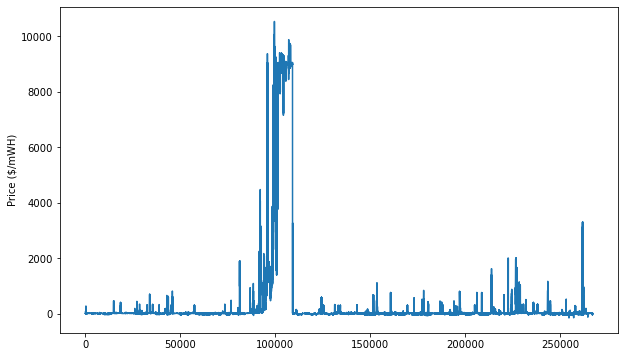

In [39]:
plt.figure(figsize=(10,6))

plt.plot(prices_df['Settlement Point Price'])

plt.ylabel('Price ($/mWH)')

plt.show()

In [40]:
hourly_load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Datetime       2159 non-null   datetime64[ns]
 1   Hour Ending    2159 non-null   int64         
 2   Hour Interval  2159 non-null   int64         
 3   COAST          2159 non-null   float64       
 4   EAST           2159 non-null   float64       
 5   FWEST          2159 non-null   float64       
 6   NORTH          2159 non-null   float64       
 7   NCENT          2159 non-null   float64       
 8   SOUTH          2159 non-null   float64       
 9   SCENT          2159 non-null   float64       
 10  WEST           2159 non-null   float64       
 11  ERCOT          2159 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 202.5 KB
